# Atividade 01 - Parte 01: Inventário de emissões utilizando Python


#### Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

## Introdução

O presente estudo tem o objetivo de realizar uma estimativa das emissões de Material Particulado (PM), Óxidos de Nitrogênio (NOx), Dóxido de Enxofre (SO2) e Dióxido de carbono (CO2) com base em dados do Relatório de ESG do grupo MOHAWK, o qual a marca Eliane revestimentosfaz parte. Foi utilizado o capítulo 11.7 da AP42, pois o empreendimento trata-se de uma Indústria de Revestimentos Cerâmicos (https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf).

Os valores descritos na tabela seguir apresenta os fatores de emissão fornecidos pela AP-42, os quais foram convertidos de lb/ton para kg/ton, conforme instruções da Ap-42. Para o dióxido de enxofre (SO2), foi adotado o valor citado na referência: "Reference 10. For facilities using raw material with a sulfur content greater than 0.07 percent. The variable S represents the raw material sulfur content (percent). For facilities using raw material with a sulfur content less than or equal to 0.07 percent, use 9.5 S lb/ton to estimate emissions.”

## Fluxograma do processo produtivo

In [57]:
# se sobrar tempo colocar o fluxograma aqui 

## Planilha de fatores de emissões compilada

In [58]:
import pandas as pd
import os
from IPython.display import display

# Coletando o caminho da pasta que estamos
caminho_atual = os.getcwd()

# Definindo o caminho da pasta dos fatores de emissão
caminho_fe = os.path.join(caminho_atual, 'tabelas', 'FE')

# Indicando o número do capítulo e subcapítulo
capitulo = 11
subcapitulo = 7

# Construindo o nome do arquivo
nome_arquivo = f'chp_{capitulo}_{subcapitulo}.csv'

# Caminho completo do arquivo
caminho_arquivo = os.path.join(caminho_fe, nome_arquivo)

# Abrindo o arquivo utilizando o Pandas
fe = pd.read_csv(caminho_arquivo)

# Estilizando a planilha com cores alternadas para as linhas e colunas
styled_fe = fe.style.set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([
                         {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
                         {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                         {'selector': 'th', 'props': [('background-color', '#e6e6e6')]},
                         {'selector': 'td', 'props': [('background-color', 'white')]}
                     ])

# Exibindo a planilha estilizada na tela
display(styled_fe)

#obs: centralizar a planilha e diminuir casas decimais se possível

,Source,PM,SO2,NOX
0,Comminution,0.060000,nan,nan
1,Dryer,1.150000,nan,nan
2,Cooler,0.055000,nan,nan
3,Granulation,0.095000,nan,nan
4,Firing natural gas,0.245000,4.750000,0.270000
5,Refiring natural gas,0.033500,nan,nan
6,Ceramic glaze spray booth,0.900000,nan,nan


## Estimativa da produção: premissas adotadas e valores fornecidos

Conforme dados institucionais de 2021, a Eliane revestimentos produz 40.8 milhões de m² de revestimentos por ano, distribuídos em 6 unidades em todo o Brasil. Assumindo a premissa de que cada unidade produz a mesma quantidade, a unidade de interesse, em Criciúma - SC, produziria aproximadamente 6.8 milhões de m² de revestimento.

Além disso, de modo a estimar este valor em toneladas, foram utilizados os valores de peso e medida do modelo mais vendido da fábrica, o porcelanato Bianco plus NA 60X60 com as seguintes especificações técnicas:

- Peso da caixa: 30,38 kg
- Rendimento: 1,44 m²

Portanto, se: 

30,38 kg ----- 1,44 m² 

   X     ----- 6.8 x 10^6 m²

X = 143.46111 x 10^6 kg = 143461,11 toneladas/ano 

ou então, 

11955,09 toneladas/mês. Também assumindo a premissa de uma escala produtiva uniforma ao longo do ano.

## Plotando os fatores de emissão

364176.02773499995
1
2
3


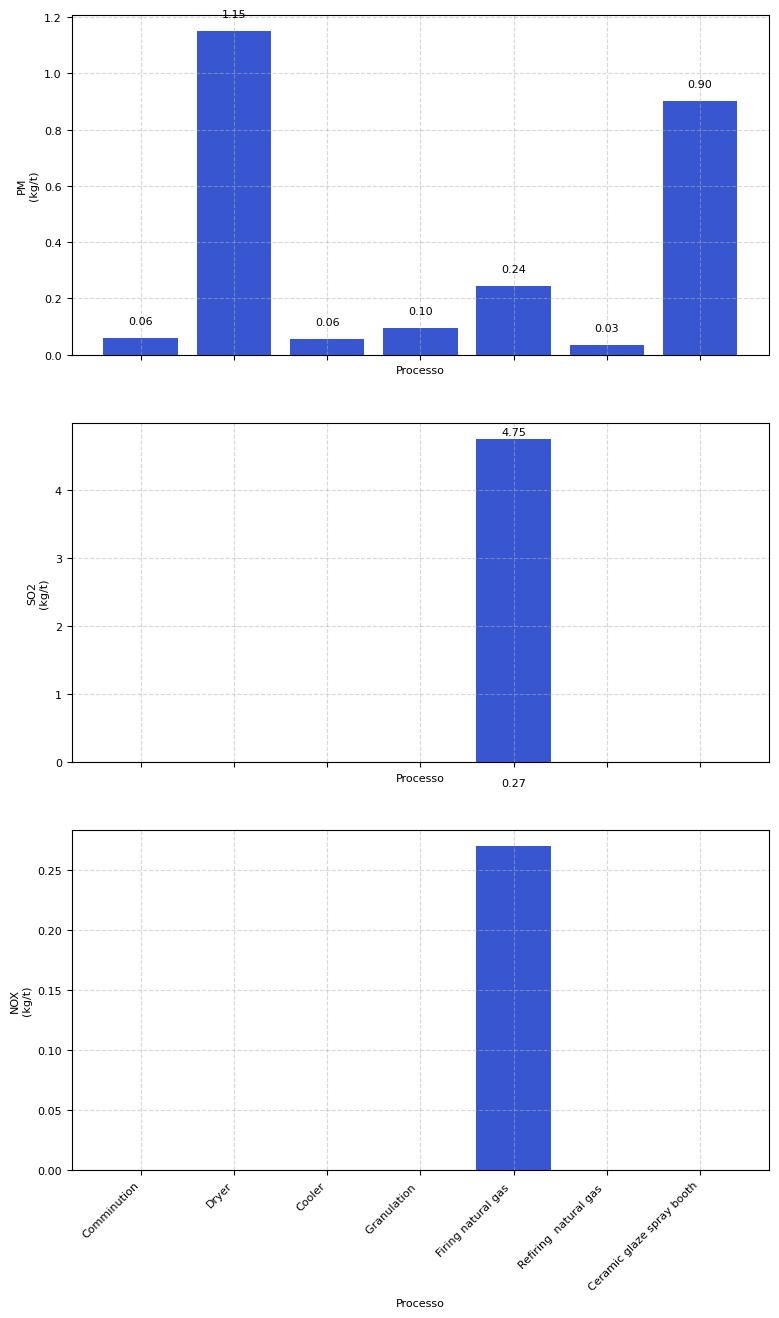

In [59]:
import matplotlib.pyplot as plt
import numpy as np

atv = 143461.11  # A unidade descrita aqui é toneladas. Os processos para determinar este valor estão descritos anteriormente
emis = fe['PM'] * atv

cwd = os.getcwd()

# Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color=['#3856CF'])
    ax[ii - 1].set_xlabel('Processo', fontsize=8)  # Define o tamanho da fonte para o eixo x
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n(kg/t)', fontsize=8)  # Define o tamanho da fonte para o eixo y

    # Define o tamanho da fonte para os rótulos dos ticks nos eixos x e y
    ax[ii - 1].tick_params(axis='x', labelsize=8)
    ax[ii - 1].tick_params(axis='y', labelsize=8)

    # Define os rótulos dos ticks nos eixos x
    ax[ii - 1].set_xticks(fe['Source'].index)  # Define a localização dos ticks no eixo x
    ax[ii - 1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)  # Define os rótulos dos ticks no eixo x

    # Adicionando linhas de grade
    ax[ii - 1].grid(True, linestyle='--', alpha=0.5)

    # Adicionando rótulos nos topos das barras
    for x, y in zip(fe['Source'], fe.iloc[:, ii]):
        if np.isfinite(y):  # Verifica se o valor de y é finito
            ax[ii - 1].text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=8)

# Salva a figura na pasta figures
fig.savefig(cwd + '\\figures\\barplot_fatorEmiss.png')

plt.show()


### Qual é o processo do empreendimento que possui maior emissão? analise os fatores de emissão através de figuras, comparando os processos

Não é possível avaliar de forma precisa qual o processo do empreendimento que produz mais poluentes devido a ausência de valores de fatores de emissão para todos os processos mencionados, fazendo com que não seja possível avaliá-los de forma igual. Entretanto, se for levado em consideração apenas a emissão de partículado, o processo que possui a maior emissão é a o secador ou "dryer".

# Criando taxa de atividade aleatória com sazonalidade

### Série temporal das emissões mensais do empreendimento

XXXXXXXXX EXPLICAR acho que tem que dividir os valores anterioires por por 12 e premissas adotadas para atividade máxima e min
### Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

        Atividade
0    20338.847714
1    16749.491256
2    21784.633725
3    22540.046556
4    21283.776432
..            ...
995  13738.647592
996  13393.014562
997  18347.480023
998  13059.687311
999  18985.560886

[1000 rows x 1 columns]


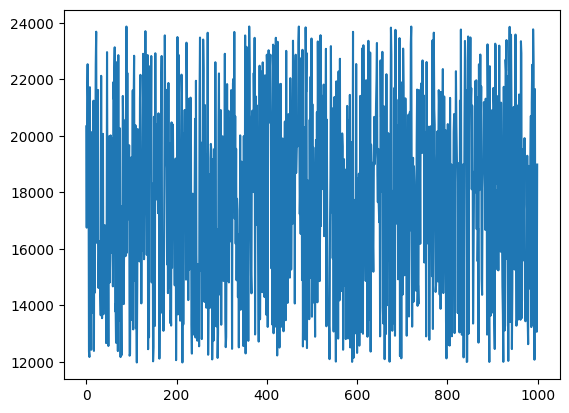

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Criando vetor de valores aleatórios
atvMax = 11955.0925
atvMin = 23910.185 #2 vezes a atividade mínima
n = 1000
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
#print(atv)

# Exportando os dados para um arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)

# Criando DataFrame com os dados aleatórios
df = pd.DataFrame({'Atividade': atv})
print(df)

# Salvando o DataFrame como arquivo .csv
df.to_csv(output_path, index=False)

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [48]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

# Mostrar o DataFrame resultante
print(df)

#obs: este dataframe esta com resolução apenas de dias?

                    Data  Mes  Dia
0    2024-01-01 00:00:00    1    1
1    2024-01-01 01:00:00    1    1
2    2024-01-01 02:00:00    1    1
3    2024-01-01 03:00:00    1    1
4    2024-01-01 04:00:00    1    1
...                  ...  ...  ...
8756 2024-12-30 20:00:00   12   30
8757 2024-12-30 21:00:00   12   30
8758 2024-12-30 22:00:00   12   30
8759 2024-12-30 23:00:00   12   30
8760 2024-12-31 00:00:00   12   31

[8761 rows x 3 columns]


                    Data  Mes  Dia     atividade
0    2024-01-01 00:00:00    1    1  21166.031448
1    2024-01-01 01:00:00    1    1  13371.965768
2    2024-01-01 02:00:00    1    1  14758.052430
3    2024-01-01 03:00:00    1    1  13301.549102
4    2024-01-01 04:00:00    1    1  20166.891466
...                  ...  ...  ...           ...
8756 2024-12-30 20:00:00   12   30  23719.060089
8757 2024-12-30 21:00:00   12   30  21225.435327
8758 2024-12-30 22:00:00   12   30  21059.778981
8759 2024-12-30 23:00:00   12   30  13469.841335
8760 2024-12-31 00:00:00   12   31  23776.641613

[8761 rows x 4 columns]


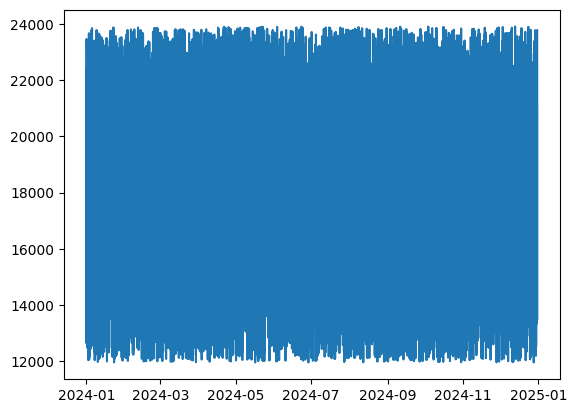

In [49]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ0.csv")

#Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(datas, atv)

0       1.999852
1       1.999852
2       1.999852
3       1.999852
4       1.999852
          ...   
8756    1.869589
8757    1.869589
8758    1.869589
8759    1.869589
8760    1.860961
Name: Dia, Length: 8761, dtype: float64


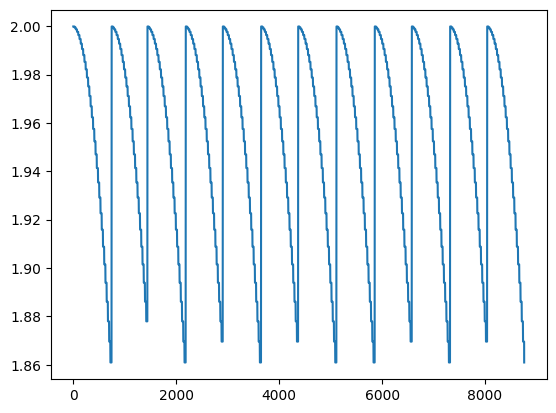

In [55]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia']/365)+1
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv 
print(sazonalidade)

df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ.csv")

                    Data  Mes  Dia     atividade  sazonalidade  \
0    2024-01-01 00:00:00    1    1  21166.031448      1.866025   
1    2024-01-01 01:00:00    1    1  13371.965768      1.866025   
2    2024-01-01 02:00:00    1    1  14758.052430      1.866025   
3    2024-01-01 03:00:00    1    1  13301.549102      1.866025   
4    2024-01-01 04:00:00    1    1  20166.891466      1.866025   
...                  ...  ...  ...           ...           ...   
8756 2024-12-30 20:00:00   12   30  23719.060089      2.000000   
8757 2024-12-30 21:00:00   12   30  21225.435327      2.000000   
8758 2024-12-30 22:00:00   12   30  21059.778981      2.000000   
8759 2024-12-30 23:00:00   12   30  13469.841335      2.000000   
8760 2024-12-31 00:00:00   12   31  23776.641613      2.000000   

      aleatorioSazonal  
0         39496.352379  
1         24952.427822  
2         27538.900746  
3         24821.028535  
4         37631.931791  
...                ...  
8756      47438.120177  
8757   

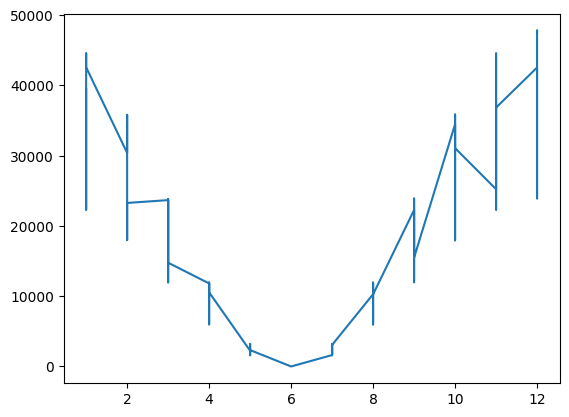

In [51]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 
print(df)

plt.plot(df['Mes'], df['aleatorioSazonal'])

{'PM': Mes
1     2.445879e+07
2     1.869773e+07
3     1.326995e+07
4     6.448200e+06
5     1.811275e+06
6     0.000000e+00
7     1.769632e+06
8     6.670031e+06
9     1.297293e+07
10    1.998869e+07
11    2.384697e+07
12    2.582589e+07
Name: aleatorioSazonal, dtype: float64, 'SO2': Mes
1     2.445879e+07
2     1.869773e+07
3     1.326995e+07
4     6.448200e+06
5     1.811275e+06
6     0.000000e+00
7     1.769632e+06
8     6.670031e+06
9     1.297293e+07
10    1.998869e+07
11    2.384697e+07
12    2.582589e+07
Name: aleatorioSazonal, dtype: float64, 'NOX': Mes
1     2.445879e+07
2     1.869773e+07
3     1.326995e+07
4     6.448200e+06
5     1.811275e+06
6     0.000000e+00
7     1.769632e+06
8     6.670031e+06
9     1.297293e+07
10    1.998869e+07
11    2.384697e+07
12    2.582589e+07
Name: aleatorioSazonal, dtype: float64, 'CO2': Mes
1     2.445879e+07
2     1.869773e+07
3     1.326995e+07
4     6.448200e+06
5     1.811275e+06
6     0.000000e+00
7     1.769632e+06
8     6.670031e+06


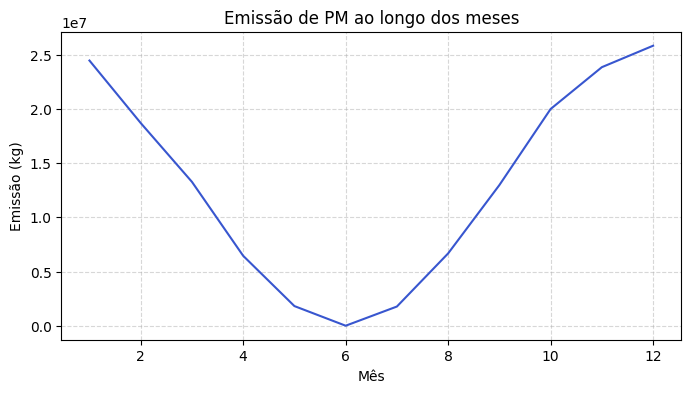

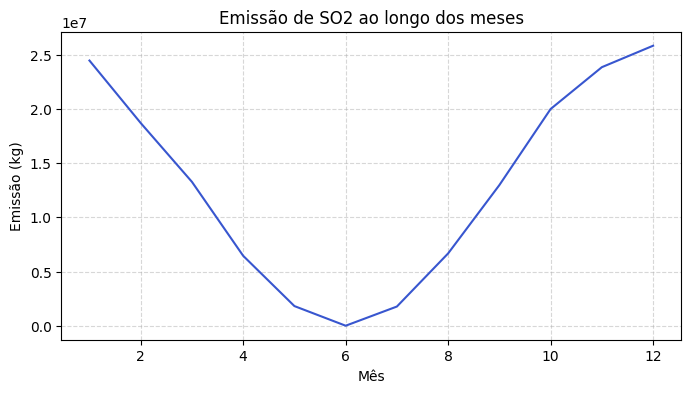

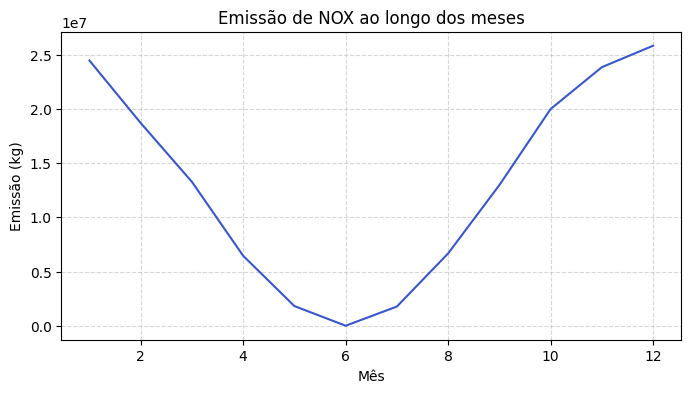

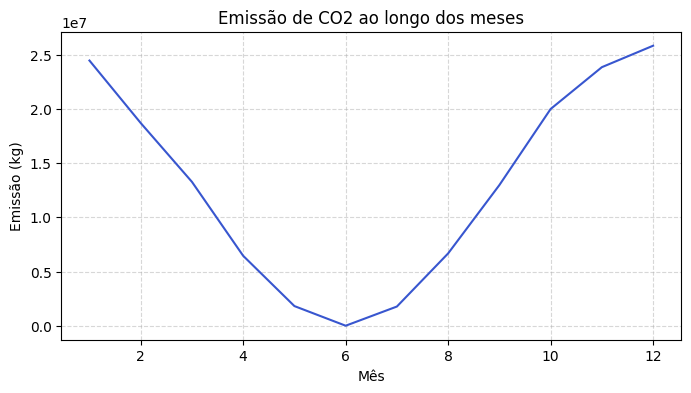

In [52]:
# Calcular a emissão mensal para cada poluente
emissoes_mensais = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_mensais[poluente] = df.groupby('Mes')['aleatorioSazonal'].sum()
print(emissoes_mensais)

# Plotar os gráficos de emissão para cada poluente
for poluente, emissao_mensal in emissoes_mensais.items():
    plt.figure(figsize=(8, 4))
    plt.plot(emissao_mensal.index, emissao_mensal.values, color='#3856CF')
    plt.title(f'Emissão de {poluente} ao longo dos meses')
    plt.xlabel('Mês')
    plt.ylabel('Emissão (kg)')
    plt.grid(True, linestyle='--', alpha=0.5)  # Adicionando linhas de grade
    plt.show()



## Série temporal das emissões horárias do empreendimento

Dado que só possuímos um dado anual, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 toneladas por dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, consideramos dois cenários. No primeiro cenário, a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Parâmetros para valores aleatórios
atvMax = 393.54
atvMin = 392.54

# Criando vetor de datas
datas_horarias = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h')

# Número de datas
n = len(datas_horarias)

# Gerando valores aleatórios ajustados ao número de datas
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Criando DataFrame com as datas e valores de atividade aleatória
df = pd.DataFrame({'Data': datas_horarias, 'Atividade': atv})

# Salvando o DataFrame como arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)
df.to_csv(output_path, index=False)

# Extrair os horários das datas e adicioná-los como uma nova coluna no DataFrame
df['Hora'] = df['Data'].dt.hour

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Imprimindo o DataFrame
print("DataFrame:")
print(df)




DataFrame:
                    Data   Atividade  Hora  Mes
0    2023-01-01 00:00:00  392.800573     0    1
1    2023-01-01 01:00:00  393.327960     1    1
2    2023-01-01 02:00:00  393.497458     2    1
3    2023-01-01 03:00:00  392.553985     3    1
4    2023-01-01 04:00:00  392.800148     4    1
...                  ...         ...   ...  ...
8755 2023-12-31 19:00:00  393.032600    19   12
8756 2023-12-31 20:00:00  393.387312    20   12
8757 2023-12-31 21:00:00  393.423329    21   12
8758 2023-12-31 22:00:00  392.847240    22   12
8759 2023-12-31 23:00:00  393.233896    23   12

[8760 rows x 4 columns]


0       393.406025
1       393.406025
2       393.406025
3       393.406025
4       393.406025
           ...    
8756    393.540000
8757    393.540000
8758    393.540000
8759    393.540000
8760    393.540000
Name: Mes, Length: 8761, dtype: float64


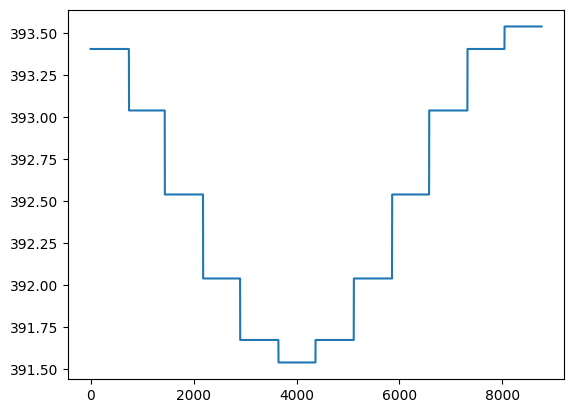

In [40]:
# Gerando componente sazonal com o método de Monte Carlos

atvMax = 393.54 # Define os limites superior e inferior do intervalo desejado para os dados.
atvMin = 392.54 # avaliar estes limites 
sazonalidade = (atvMax - atvMin)*sazonalidade + atvMin #Aplica o método de Monte Carlo para transformar uma amostra de dados aleatórios entre 0 e 1 (gerada anteriormente) em uma amostra dentro do intervalo desejado. O método de Monte Carlo é comumente usado para simulações e cálculos numéricos. Aqui, está sendo usado para escalar e transladar os valores aleatórios gerados anteriormente para o intervalo desejado.


df['sazonalidade'] = sazonalidade + 1
df.to_csv # Criando componente sazonal
print(sazonalidade)

plt.plot(sazonalidade)
df.to_csv(r"C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\tabelas\ativ.csv")

                    Data   Atividade  Hora  Mes  sazonalidade  \
0    2023-01-01 00:00:00  392.800573     0    1    394.406025   
1    2023-01-01 01:00:00  393.327960     1    1    394.406025   
2    2023-01-01 02:00:00  393.497458     2    1    394.406025   
3    2023-01-01 03:00:00  392.553985     3    1    394.406025   
4    2023-01-01 04:00:00  392.800148     4    1    394.406025   
...                  ...         ...   ...  ...           ...   
8755 2023-12-31 19:00:00  393.032600    19   12    394.540000   
8756 2023-12-31 20:00:00  393.387312    20   12    394.540000   
8757 2023-12-31 21:00:00  393.423329    21   12    394.540000   
8758 2023-12-31 22:00:00  392.847240    22   12    394.540000   
8759 2023-12-31 23:00:00  393.233896    23   12    394.540000   

      aleatorioSazonal  
0        154922.912631  
1        155130.917536  
2        155197.768565  
3        154825.657064  
4        154922.745325  
...                ...  
8755     155067.082095  
8756     155207.030

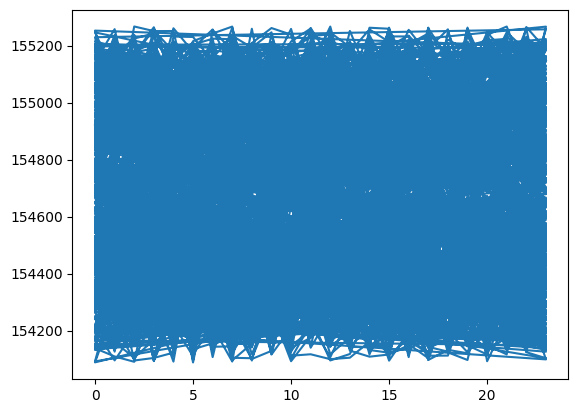

In [41]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['Atividade'] * df['sazonalidade'] 
print(df)

plt.plot(df['Hora'], df['aleatorioSazonal'])

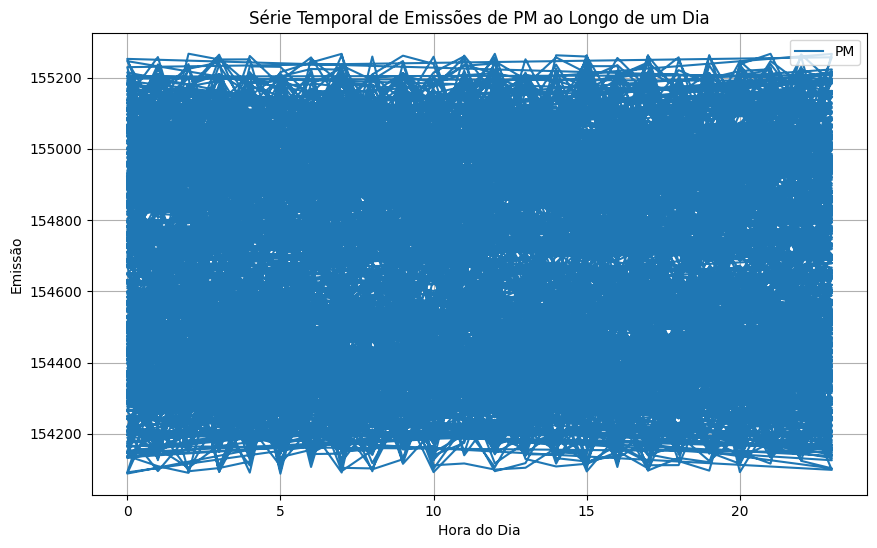

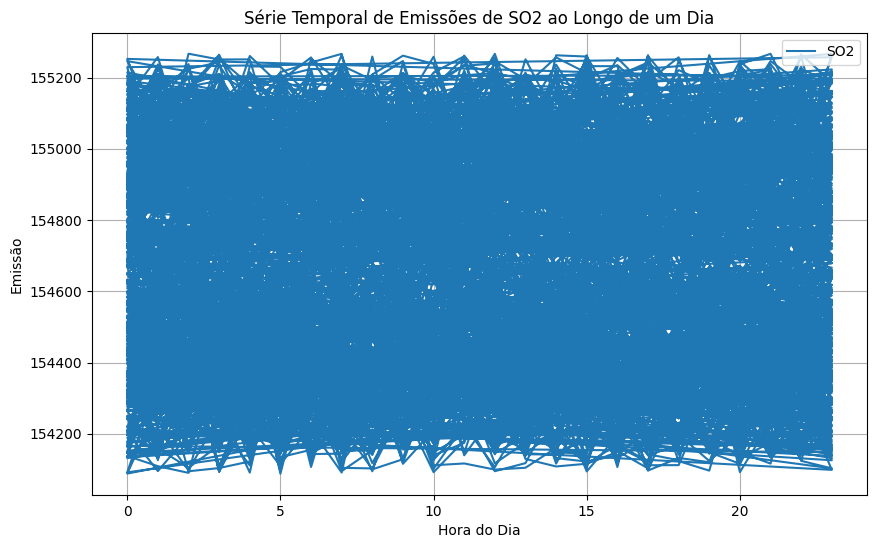

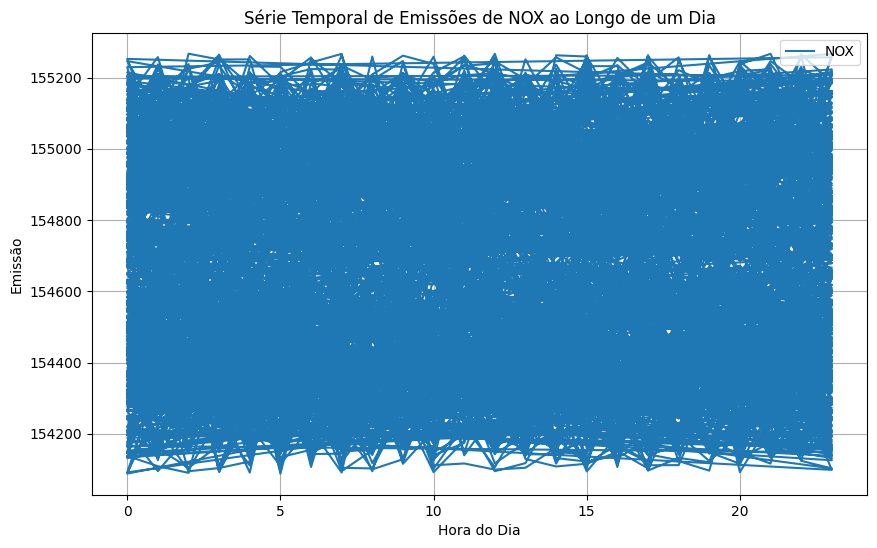

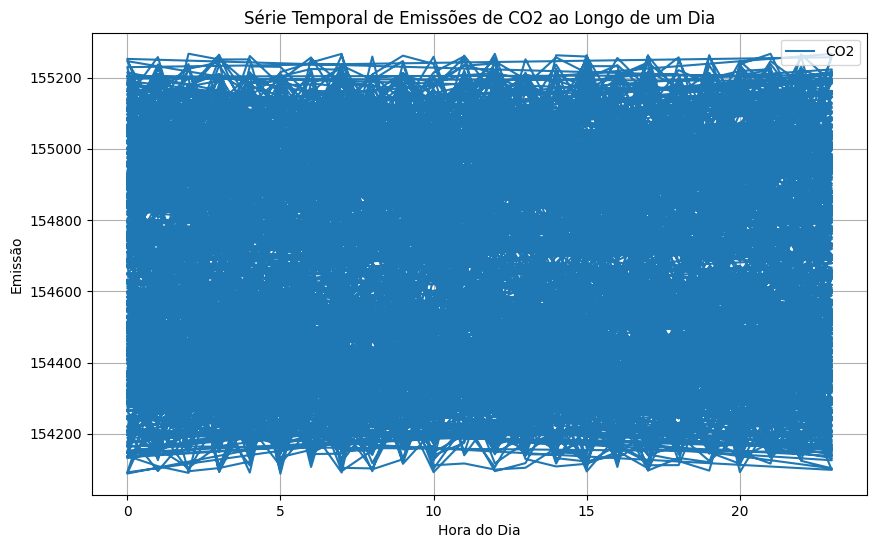

In [42]:
# Iterar sobre cada poluente e plotar um gráfico separado para cada um
for poluente in fe.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Hora'], df['aleatorioSazonal'], label=poluente)
    plt.title(f'Série Temporal de Emissões de {poluente} ao Longo de um Dia')
    plt.xlabel('Hora do Dia')
    plt.ylabel('Emissão')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


### Qual a variabilidade temporal da taxa de atividade? estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória. Faça figuras e discuta. 

In [ ]:
##### sazonalidade 

### Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

In [43]:
# Calcular as emissões mensais para cada poluente
emissoes_mensais = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_mensais[poluente] = df.groupby('Mes')['aleatorioSazonal'].sum()

# Calcular as emissões totais mensais em g/s para cada poluente
emissoes_totais_g_s = {}
for poluente, emissao_mensal in emissoes_mensais.items():
    emissoes_totais_g_s[poluente] = emissao_mensal * 1000 / (30 * 24 * 3600)  # Convertendo kg para g e dividindo pelo número de segundos em um mês

# Calcular as emissões totais para cada poluente considerando todos os processos
emissoes_totais = {}
for poluente in fe.columns[1:]:
    atv_processo = (atvMax - atvMin) * np.random.rand(len(fe)) + atvMin
    emissoes_totais[poluente] = fe[poluente] * atv_processo

# Calcular a emissão média, mínima e máxima para cada poluente
resultados_emissoes = {}
for poluente, emissao_total in emissoes_totais.items():
    emissao_media = emissao_total.mean()  # Média das emissões totais
    emissao_minima = emissao_total.min()  # Mínima das emissões totais
    emissao_maxima = emissao_total.max()  # Máxima das emissões totais
    resultados_emissoes[poluente] = {
        'Emissão Média (g/s)': emissao_media,
        'Emissão Mínima (g/s)': emissao_minima,
        'Emissão Máxima (g/s)': emissao_maxima
    }

# Exibir os resultados para cada poluente
for poluente, resultados in resultados_emissoes.items():
    print(f"Resultados para o poluente '{poluente}':")
    for chave, valor in resultados.items():
        print(f"{chave}: {valor} ")
    print()  # Adiciona uma linha em branco após cada conjunto de resultados


Resultados para o poluente 'PM':
Emissão Média (g/s): 142.4336705302513 
Emissão Mínima (g/s): 13.154845778347878 
Emissão Máxima (g/s): 451.4264318711908 

Resultados para o poluente 'SO2':
Emissão Média (g/s): 1868.929257299703 
Emissão Mínima (g/s): 1868.929257299703 
Emissão Máxima (g/s): 1868.929257299703 

Resultados para o poluente 'NOX':
Emissão Média (g/s): 106.01921767040986 
Emissão Mínima (g/s): 106.01921767040986 
Emissão Máxima (g/s): 106.01921767040986 

Resultados para o poluente 'CO2':
Emissão Média (g/s): 86212.53189216017 
Emissão Mínima (g/s): 19054.8609675776 
Emissão Máxima (g/s): 153370.20281674273 



Referências
- https://mohawkind.com/_pdf/Eliane_2022_ESG_PT.pdf
- https://www.eliane.com/institucional
- https://www.eliane.com/produtos/bianco-plus-na-60x60-sc-8017071 

In [ ]:
somar a varialibilidade a sazonalidade  e não multiplicar, eu tenho que colocar em variação diaária 